# Predicting Heart Disease Using Machine Learning 

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem Definition.
2. Data.
3. Evaluation.
4. Features.
5. Modelling.
6. Experimentation.

## 1. Problem Definition

> In a statement, Given clinical parameters about of patient can we predict whether or not they have heart disease?

## 2. Data

The original data came from the cleaveland data from the UCI machine learning repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version available on kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4.Features

** Data Dictionary **
* 1. age - age in years
* 2. sex - (1 = male; 0 = female)
* 3. cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
* 4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* 5. chol - serum cholestoral in mg/dl
* 6. serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern
        fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes.
* 7. restecg - resting electrocardiographic results
        0: Nothing to note.
        1: ST-T Wave abnormality,
        can range from mild symptoms to severe problems
        signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
        Enlarged heart's main pumping chamber
* 8. thalach - maximum heart rate achieved
* 9. exang - exercise induced angina (1 = yes; 0 = no)
* 10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* 11. slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
* 12. ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
* 13. thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
* 14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use Pandas, Numpy and Matplotlib for data analysis and data manipulation.

In [200]:
# Importing all the tools(libraries) we need.
# Regular EDA (Exploratory Data Analysis) and plotting libraries/tools.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation Tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data and Initial Checks.

In [201]:
df = pd.read_csv("data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [202]:
df.shape

(303, 14)

## Data Exploration (Exploratory Data Analysis or EDA)

In [203]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [204]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [205]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

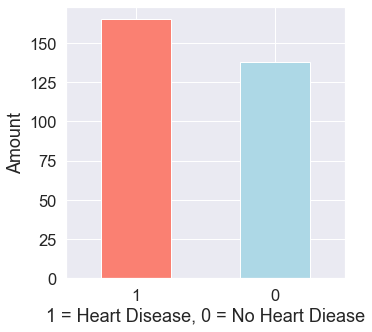

In [206]:
df.target.value_counts().plot(kind = "bar"
                             ,color = ["salmon", "lightblue"]
                             ,figsize=(5,5))

plt.xlabel("1 = Heart Disease, 0 = No Heart Diease")
plt.ylabel("Amount")
plt.xticks(rotation=0);

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [208]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [209]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Exploring The Patterns in the Data

In [210]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [211]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


Here we can see that, if the sample is women there is 75% chances that she has heart disease. Similarly, we can say that if the sample is man there is 50% chances that he has heart disease. We can also say that for a sample there is 60% chance (average of 50% and 70%) we will use this as baseline and what we want to achieve is the accuracy of the model to be atleast above 60%.

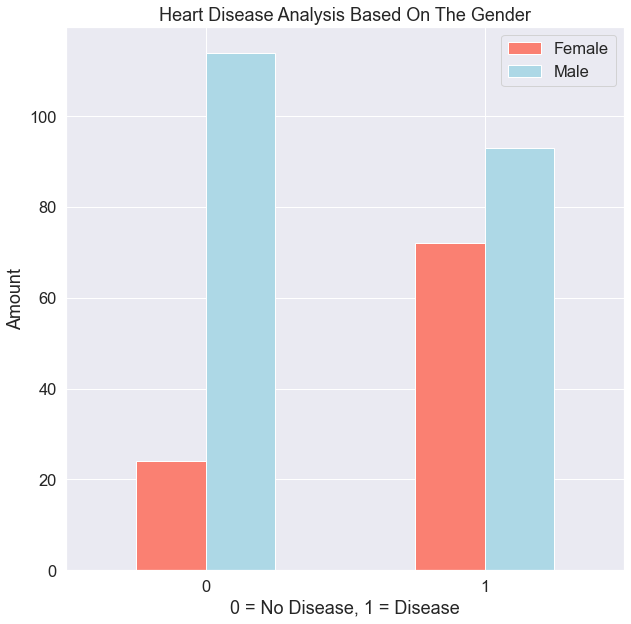

In [212]:
pd.crosstab(df.target, df.sex).plot(kind = "bar"
                                   ,color = ["salmon", "lightblue"]
                                   ,figsize=(10,10))

plt.title("Heart Disease Analysis Based On The Gender")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.legend(["Female", "Male"])
plt.show()

In [213]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [214]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

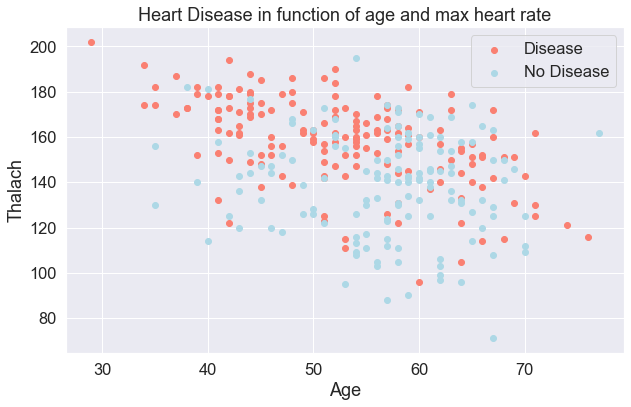

In [215]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target == 1]
           ,df.thalach[df.target == 1]
           ,c="salmon")

plt.scatter(df.age[df.target == 0]
           ,df.thalach[df.target == 0]
           ,c="lightblue")

plt.title("Heart Disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.legend(["Disease", "No Disease"])
plt.show()

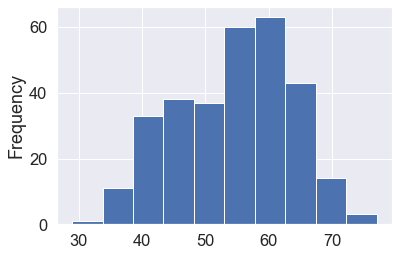

In [216]:
df.age.plot.hist()
plt.show()

In [217]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


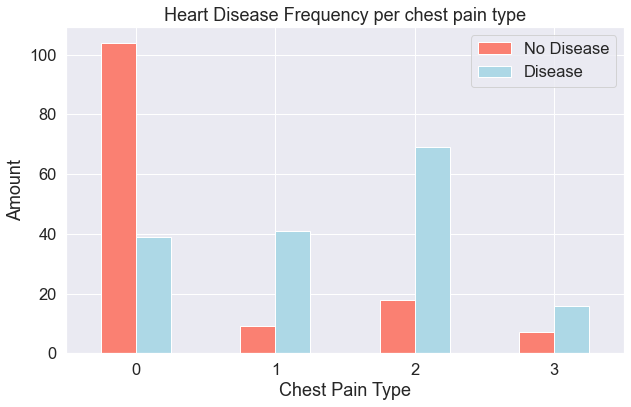

In [218]:
pd.crosstab(df.cp, df.target).plot(kind = "bar"
                                  ,figsize=(10,6)
                                  ,color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)
plt.show()

In [219]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


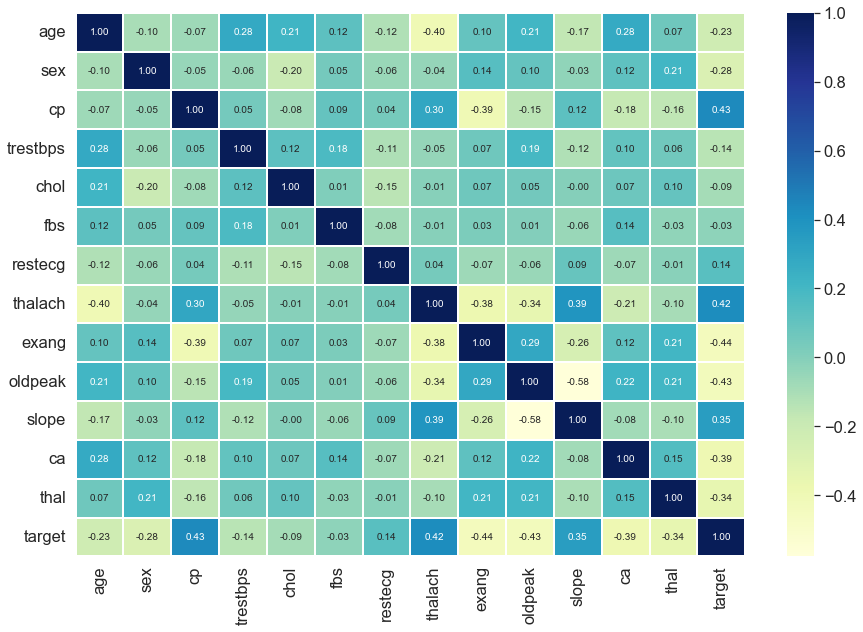

In [220]:
correlation_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(correlation_matrix
             ,annot=True
             ,linewidth=2
             ,fmt=".2f"
             ,cmap="YlGnBu")


plt.yticks(rotation=0)
plt.show()

## Preparing Our Data for ML.

In [221]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [222]:
X = df.drop("target", axis=1)
y = df.target

In [223]:
np.random.seed(42) # To reproduce our results

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [224]:
len(X_train), len(X_test)

(242, 61)

In [225]:
len(y_train), len(y_test)

(242, 61)

In [226]:
models = {
    "Logistic Regression":LogisticRegression(n_jobs=-1),
    "KNN":KNeighborsClassifier(n_jobs=-1),
    "Random Forest":RandomForestClassifier(n_jobs=-1)
}

In [227]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[model_name] = model.score(X_test, y_test)
        

    return model_scores

In [228]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

In [229]:
# We can see that Logistic Regerssion Worked the best.(eventhough it is not in the scikit learn choosing right estimator map.)
# Now we will proceed with improving these models by hyperparameter tuning.

In [230]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

In [231]:
model_comparison = pd.DataFrame(model_scores, index=["accuracy"])
model_comparison = model_comparison.T

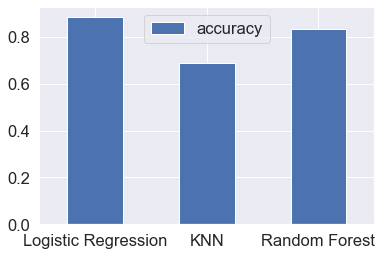

In [232]:
model_comparison.plot.bar()
plt.xticks(rotation=0)
plt.legend()
plt.show()

### Our Focus 
- Hyperparameter tuning
- Feature Importance 
- Confusion Matrix
- Cross Validation
- Precision
- Recall
- F1 Score
- Classification Report
- ROC Curve
- Area under ROC Curve (AUC)

In [233]:
train_scores = []
test_scores = []

neighbors = range(1, 21)
knn = KNeighborsClassifier(n_jobs=-1)

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_scores.append(knn.score(X_test, y_test))
    train_scores.append(knn.score(X_train, y_train))

In [234]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [235]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

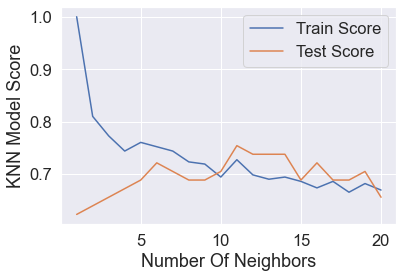

In [236]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xlabel("Number Of Neighbors")
plt.ylabel("KNN Model Score")
plt.legend()
plt.show()

In [237]:
print(f"The maximum score achieved was {max(test_scores)*100:.2f}%")

The maximum score achieved was 75.41%


The max score obtained even after hyperparameter tuning is till less than the other two competitors model, so we will drop KNN.

In [238]:
log_reg_grid = {
    "C":np.logspace(-4, 4, 20),
    "solver":["liblinear"]
}

rf_grid={
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None, 3, 5 ,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}

In [239]:
np.random.seed(42)
log_reg_rs = RandomizedSearchCV(estimator=LogisticRegression(n_jobs=-1),
                               cv = 5,
                               verbose = 0,
                               param_distributions=log_reg_grid)

rf_rs = RandomizedSearchCV(estimator = RandomForestClassifier(n_jobs=-1),
                          cv=5,
                          verbose=0,
                          param_distributions=rf_grid)

In [240]:
log_reg_rs.fit(X_train, y_train)
rf_rs.fit(X_train, y_train)

C:\Users\jaina\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\jaina\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\jaina\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\jaina\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])})

In [241]:
log_reg_rs.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [242]:
rf_rs.best_params_

{'n_estimators': 610,
 'min_samples_split': 10,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [243]:
log_reg_rs.score(X_test, y_test)

0.8852459016393442

In [244]:
rf_rs.score(X_test, y_test)

0.8688524590163934

In [245]:
gs_log_reg = GridSearchCV(LogisticRegression(), log_reg_grid, cv=5, verbose=2, n_jobs=-1)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [246]:
y_preds = gs_log_reg.predict(X_test)

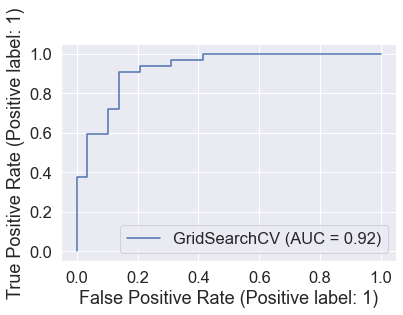

In [247]:
plot_roc_curve(gs_log_reg, X_test, y_test)
plt.show()

In [248]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [249]:
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)

    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")

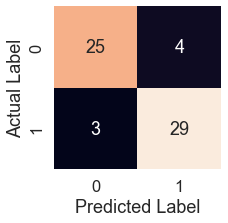

In [250]:
plot_conf_matrix(y_test, y_preds)

In [251]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [252]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [253]:
model = LogisticRegression(C = 0.23357214690901212, solver = 'liblinear')

In [254]:
model.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [255]:
cv_acc = cross_val_score(model, X, y, cv=5, scoring="accuracy")
cv_precision = cross_val_score(model, X, y, cv=5, scoring="precision")
cv_recall = cross_val_score(model, X, y, cv=5, scoring="recall")
cv_f1 = cross_val_score(model, X, y, cv=5, scoring="f1")

cv_acc = np.mean(cv_acc)
cv_recall = np.mean(cv_recall)
cv_precision = np.mean(cv_precision)
cv_f1 = np.mean(cv_f1)

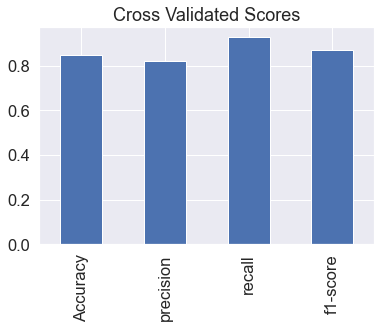

In [256]:
df = pd.DataFrame({"Accuracy":cv_acc,
                  "precision":cv_precision,
                  "recall":cv_recall,
                  "f1-score":cv_f1},
                 index=[0])

df.T.plot.bar(legend=False)
plt.title("Cross Validated Scores")
plt.show()

### Feature Importance

In [257]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [258]:
model = LogisticRegression(C=0.2043359, solver="liblinear")
model.fit(X_train, y_train)

model.coef_

array([[ 0.00316728, -0.86044666,  0.66067025, -0.01156993, -0.00166375,
         0.04386098,  0.31275864,  0.02459362, -0.60413089, -0.56862784,
         0.45051628, -0.63609906, -0.67663368]])

In [259]:
df = pd.read_csv("data/heart-disease.csv")
feature_dict = dict(zip(df.columns, list(model.coef_[0])))

In [260]:
feature_dict

{'age': 0.0031672819550314086,
 'sex': -0.8604466617396942,
 'cp': 0.6606702544647339,
 'trestbps': -0.011569932031281012,
 'chol': -0.001663745263830542,
 'fbs': 0.04386097716862402,
 'restecg': 0.3127586369835613,
 'thalach': 0.02459361535806549,
 'exang': -0.6041308942476562,
 'oldpeak': -0.5686278422096082,
 'slope': 0.4505162758149992,
 'ca': -0.6360990554871792,
 'thal': -0.6766336778922007}

In [261]:
feature_df = pd.DataFrame(feature_dict, index=[0])

<AxesSubplot:title={'center':'Feature Importance'}>

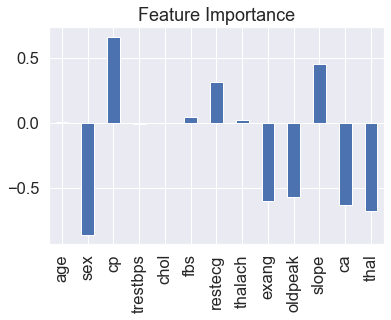

In [262]:
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [263]:

pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [265]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [268]:
model.coef_[0]

array([ 0.00316728, -0.86044666,  0.66067025, -0.01156993, -0.00166375,
        0.04386098,  0.31275864,  0.02459362, -0.60413089, -0.56862784,
        0.45051628, -0.63609906, -0.67663368])